In [702]:
#Import the libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## Download and Unzip the dataset.

In [472]:
# url_to_the_zip_file = "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/34330/3265183/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1647437599&Signature=qVPxXAvAiFlZLpO%2Fp287NXm%2FlUOymBxRMs7NJKMGXlm3afW9PV9LuNalMJS56E%2BjsMSHh46ouLS6gNHYbyPwmdLSQiPpLQPGU6NTKTNprbDUOgYb2rqC4w6AgLOpdRh%2FGdabYAVAdjIh24Teoj5k%2Bs%2Fybm00sxAGf358%2BcxjEonvvUJDEhK7GTtv9NAFxAfsO%2F69xOWSkLEhjjnCwQ3QzfXWxbuYVnqlwy0dwQ6S%2F8iQappRaQg2%2BF9j76t1ay0B3Kg3ANj0P5EuVMDL2KVld3cQLiM7DPi9vQQV531T8snYsbiHjoE%2BhkH6w%2BWeULvu5UpDSaiVRepgtoscjgM8ig%3D%3D&response-content-disposition=attachment%3B+filename%3D2110446-data-science-and-data-engineering-2022.zip"
# new_file_name = "2110446-data-science-and-data-engineering-2022.zip"

# !rm -f "$new_file_name"
# !wget -c "$url_to_the_zip_file" -O "$new_file_name"
# !unzip "$new_file_name"

## read_csv()

In [804]:
def toDF(pm25_filename, temp_filename, wind_filename):
  pm25_df = pd.read_csv('datasci_dataset_2022/'+pm25_filename, names=['Time', 'PM25'], skiprows=1)
  pm25_df['Time'] = pd.to_datetime(pm25_df['Time'])
  # pm25_df['Time'] = pm25_df['Time'].dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')
  # pm25_df['Time'] = pm25_df['Time'].dt.tz_localize(None)
  pm25_df.set_index('Time', inplace=True)
  pm25_df.columns = ['PM25']
  pm25_df = pm25_df[~pm25_df.index.duplicated(keep='first')]
  pm25_df.interpolate(inplace=True)
  pm25_df.index = pd.DatetimeIndex(pm25_df.index)

  temp_df = pd.read_csv('datasci_dataset_2022/'+temp_filename, names=['Time', 'Temp'], skiprows=1)
  temp_df['Time'] = pd.to_datetime(temp_df['Time'])
  temp_df.set_index(temp_df['Time'], inplace=True)
  temp_df.drop(columns={'Time'}, inplace=True)
  temp_df.columns = ['Temp']
  # pad() is similar to fillna() with forward filling
  temp_df = temp_df.resample('h').pad()
  # temp_df.index = pd.DatetimeIndex(temp_df.index)

  wind_df = pd.read_csv('datasci_dataset_2022/'+wind_filename, names=['Time', 'WindSpeed', 'WindDir'], skiprows=1)
  wind_df['Time'] = pd.to_datetime(wind_df['Time'])
  wind_df.set_index(wind_df['Time'], inplace=True)
  wind_df.drop(columns={'Time'}, inplace=True)
  wind_df.columns = ['WindSpeed', 'WindDir']
  # backward filling
  wind_df = wind_df.resample('h').bfill()
  # wind_df.index = pd.DatetimeIndex(wind_df.index)

  pm25_df['copy_index'] = pm25_df.index
  df = pd.merge(pm25_df, temp_df, left_index=True, right_index=True)
  df = pd.merge(df, wind_df, left_index=True, right_index=True)

  df = df[['Temp','WindSpeed','WindDir','PM25']]
  
  # padding first and last indices
  # df = df.ffill()
  # df = df.bfill()

  return df

In [806]:
def toDFtest(pm25_filename, temp_filename, wind_filename):
  pm25_df = pd.read_csv('datasci_dataset_2022/'+pm25_filename, names=['Time', 'PM25'], skiprows=1)
  pm25_df['Time'] = pd.to_datetime(pm25_df['Time'])
  pm25_df.set_index('Time', inplace=True)
  pm25_df.columns = ['PM25']
  pm25_df = pm25_df[~pm25_df.index.duplicated(keep='first')]
  pm25_df.index = pd.DatetimeIndex(pm25_df.index)

  temp_df = pd.read_csv('datasci_dataset_2022/'+temp_filename, names=['Time', 'Temp'], skiprows=1)
  temp_df['Time'] = pd.to_datetime(temp_df['Time'])
  temp_df.set_index(temp_df['Time'], inplace=True)
  temp_df.drop(columns={'Time'}, inplace=True)
  temp_df.columns = ['Temp']
  temp_df = temp_df.resample('h').bfill()

  wind_df = pd.read_csv('datasci_dataset_2022/'+wind_filename, names=['Time', 'WindSpeed', 'WindDir'], skiprows=1)
  wind_df['Time'] = pd.to_datetime(wind_df['Time'])
  wind_df.set_index(wind_df['Time'], inplace=True)
  wind_df.drop(columns={'Time'}, inplace=True)
  wind_df.columns = ['WindSpeed', 'WindDir']
  # backward filling
  wind_df = wind_df.resample('h').bfill()
  # wind_df.index = pd.DatetimeIndex(wind_df.index)

  pm25_df['copy_index'] = pm25_df.index
  df = pd.merge(pm25_df, temp_df, left_index=True, right_index=True)
  df = pd.merge(df, wind_df, left_index=True, right_index=True)

  df = df[['Temp','WindSpeed','WindDir','PM25']]

  return df

In [807]:
bkk_train = toDF('BKK/train/bkk_train.csv', 'BKK/train/bkk_temp_surface.csv', 'BKK/train/bkk_weather_wind.csv')
bkk_test = toDF('BKK/test/bkk_test.csv', 'BKK/test/bkk_temp_test.csv', 'BKK/test/bkk_wind_test.csv')

cnx_train = toDF('Chiangmai/train/chiangmai_train.csv', 'Chiangmai/train/chiangmai_temp_surface.csv', 'Chiangmai/train/chiangmai_weather_wind.csv')
cnx_test = toDF('Chiangmai/test/chiangmai_test.csv', 'Chiangmai/test/chiangmai_temp_test.csv', 'Chiangmai/test/chiangmai_wind_test.csv')

kkc_train = toDF('Khonkaen/train/khonkhan_train.csv', 'Khonkaen/train/khonkaen_temp_surface.csv', 'Khonkaen/train/khonkaen_weather_wind.csv')
kkc_test = toDF('Khonkaen/test/khonkhan_test.csv', 'Khonkaen/test/khonkaen_temp_test.csv', 'Khonkaen/test/khonkaen_wind_test.csv')

rayong_train = toDF('Rayong/train/rayong_train.csv', 'Rayong/train/rayong_temp_surface.csv', 'Rayong/train/rayong_weather_wind.csv')
rayong_test = toDF('Rayong/test/rayong_test.csv', 'Rayong/test/rayong_temp_test.csv', 'Rayong/test/rayong_wind_test.csv')

saraburi_train = toDF('Saraburi/train/saraburi_train.csv', 'Saraburi/train/saraburi_temp_surface.csv', 'Saraburi/train/saraburi_weather_wind.csv')
saraburi_test = toDF('Saraburi/test/saraburi_test.csv', 'Saraburi/test/saraburi_temp_test.csv', 'Saraburi/test/saraburi_wind_test.csv')

surat_train = toDF('Surat/train/surat_train.csv', 'Surat/train/surat_temp_surface.csv', 'Surat/train/surat_weather_wind.csv')
surat_test = toDF('Surat/test/surat_test.csv', 'Surat/test/surat_temp_test.csv', 'Surat/test/surat_wind_test.csv')

In [808]:
train_set={}
train_set['BKK'] = bkk_train
train_set['CNX'] = cnx_train
train_set['KKC'] = kkc_train
train_set['RAY'] = rayong_train
train_set['SARA'] = saraburi_train
train_set['SURAT'] = surat_train

test_set={}
test_set['BKK'] = bkk_test
test_set['CNX'] = cnx_test
test_set['KKC'] = kkc_test
test_set['RAY'] = rayong_test
test_set['SARA'] = saraburi_test
test_set['SURAT'] = surat_test

## display()

In [713]:
display(train_set['BKK'])

,Temp,WindSpeed,WindDir,PM25
Time,,,,
2017-07-01 01:00:00,27.9,16,260,10.0
2017-07-01 02:00:00,27.9,16,255,17.0
2017-07-01 03:00:00,27.9,16,255,20.0
2017-07-01 04:00:00,27.4,16,255,15.0
2017-07-01 05:00:00,27.4,17,235,16.0
...,...,...,...,...
2020-06-30 18:00:00,32.1,36,265,11.0
2020-06-30 19:00:00,30.3,36,265,15.0
2020-06-30 20:00:00,30.3,35,270,14.0


In [478]:
display(train_set['CNX'])

,Temp,WindSpeed,WindDir,PM25
Time,,,,
2017-07-01 01:00:00,23.2,32,235,5.0
2017-07-01 02:00:00,23.2,30,250,16.0
2017-07-01 03:00:00,23.2,30,250,11.0
2017-07-01 04:00:00,22.3,30,250,12.0
2017-07-01 05:00:00,22.3,30,250,15.0
...,...,...,...,...
2020-06-30 18:00:00,32.2,16,235,10.0
2020-06-30 19:00:00,27.5,16,235,16.0
2020-06-30 20:00:00,27.5,17,225,19.0


In [479]:
display(train_set['KKC'])

,Temp,WindSpeed,WindDir,PM25
Time,,,,
2017-07-01 01:00:00,26.5,28,235,7.0
2017-07-01 02:00:00,26.5,29,245,4.0
2017-07-01 03:00:00,26.5,29,245,9.0
2017-07-01 04:00:00,25.8,29,245,8.0
2017-07-01 05:00:00,25.8,28,245,6.0
...,...,...,...,...
2020-06-30 18:00:00,29.6,20,235,17.0
2020-06-30 19:00:00,29.6,20,235,13.0
2020-06-30 20:00:00,29.6,21,230,18.0


In [480]:
display(train_set['RAY'])

,Temp,WindSpeed,WindDir,PM25
Time,,,,
2017-07-01 01:00:00,27.9,21,250,6.0
2017-07-01 02:00:00,27.9,21,250,6.0
2017-07-01 03:00:00,27.9,21,250,5.0
2017-07-01 04:00:00,27.7,21,250,10.0
2017-07-01 05:00:00,27.7,22,230,9.0
...,...,...,...,...
2020-06-30 18:00:00,28.0,36,280,8.0
2020-06-30 19:00:00,27.9,36,280,11.0
2020-06-30 20:00:00,27.9,47,270,10.0


In [481]:
display(train_set['SARA'])

,Temp,WindSpeed,WindDir,PM25
Time,,,,
2017-07-01 01:00:00,26.6,38,250,16.0
2017-07-01 02:00:00,26.6,38,250,13.0
2017-07-01 03:00:00,26.6,38,250,18.0
2017-07-01 04:00:00,26.0,38,250,29.0
2017-07-01 05:00:00,26.0,38,250,32.0
...,...,...,...,...
2020-06-30 18:00:00,31.8,31,245,11.0
2020-06-30 19:00:00,27.4,31,245,17.0
2020-06-30 20:00:00,27.4,41,250,19.0


In [482]:
display(train_set['SURAT'])

,Temp,WindSpeed,WindDir,PM25
Time,,,,
2018-10-01 00:00:00,26.6,3,90,22.0
2018-10-01 01:00:00,25.8,3,90,17.0
2018-10-01 02:00:00,25.8,1,105,13.0
2018-10-01 03:00:00,25.8,1,105,12.0
2018-10-01 04:00:00,25.2,1,105,11.0
...,...,...,...,...
2020-06-30 18:00:00,30.8,19,250,36.0
2020-06-30 19:00:00,26.7,19,250,29.0
2020-06-30 20:00:00,26.7,23,260,16.0


## Number of null values

### Before Dropping

In [809]:
null_counts_bkk_train = bkk_train.isnull().sum()
print("[bkk_train] Number of null values in each column:\n{}".format(null_counts_bkk_train))
print('\n')

null_counts_cnx_train = cnx_train.isnull().sum()
print("[cnx_train] Number of null values in each column:\n{}".format(null_counts_cnx_train))
print('\n')

null_counts_kkc_train = kkc_train.isnull().sum()
print("[kkc_train] Number of null values in each column:\n{}".format(null_counts_kkc_train))
print('\n')

null_counts_rayong_train = rayong_train.isnull().sum()
print("[rayong_train] Number of null values in each column:\n{}".format(null_counts_rayong_train))
print('\n')

null_counts_saraburi_train = saraburi_train.isnull().sum()
print("[saraburi_train] Number of null values in each column:\n{}".format(null_counts_saraburi_train))
print('\n')

null_counts_surat_train = surat_train.isnull().sum()
print("[surat_train] Number of null values in each column:\n{}".format(null_counts_surat_train))

[bkk_train] Number of null values in each column:
Temp         3
WindSpeed    0
WindDir      0
PM25         0
dtype: int64


[cnx_train] Number of null values in each column:
Temp         6
WindSpeed    0
WindDir      0
PM25         0
dtype: int64


[kkc_train] Number of null values in each column:
Temp         0
WindSpeed    0
WindDir      0
PM25         0
dtype: int64


[rayong_train] Number of null values in each column:
Temp         0
WindSpeed    0
WindDir      0
PM25         0
dtype: int64


[saraburi_train] Number of null values in each column:
Temp         0
WindSpeed    0
WindDir      0
PM25         0
dtype: int64


[surat_train] Number of null values in each column:
Temp         126
WindSpeed      0
WindDir        0
PM25           0
dtype: int64


### Drop null-valued rows (Temp & PM25)

In [810]:
bkk_train.dropna(subset=['Temp','PM25'], inplace=True)

cnx_train.dropna(subset=['Temp','PM25'], inplace=True)

kkc_train.dropna(subset=['Temp','PM25'], inplace=True)

rayong_train.dropna(subset=['Temp','PM25'], inplace=True)

saraburi_train.dropna(subset=['Temp','PM25'], inplace=True)

surat_train.dropna(subset=['Temp','PM25'], inplace=True)

## Graph Plotting

In [485]:
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import kurtosis, skew

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 6)

In [486]:
def multiDisplot(dataset, col, hist=False, xlim=None):
  for prov, _ in dataset.items():
    sns.distplot(dataset[prov][col], hist=hist, label=prov)
    # print(f"{prov} {col}={dataset[prov][col].mean()}")
  plt.xlim(xlim)
  plt.legend()
  plt.show()

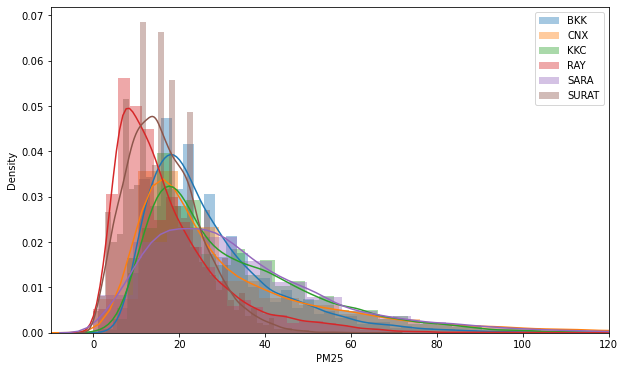

In [487]:
multiDisplot(train_set, 'PM25', xlim=(-10, 120), hist=True)

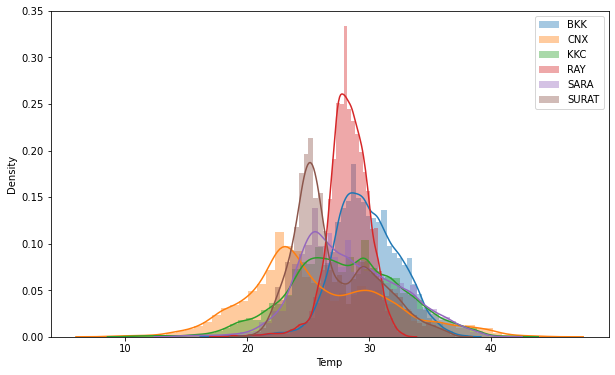

In [488]:
multiDisplot(train_set, 'Temp', hist=True)

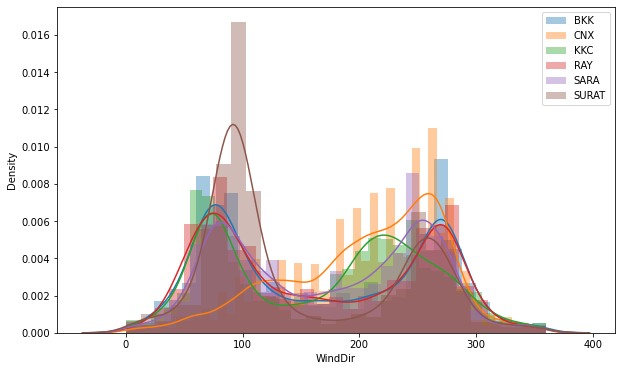

In [489]:
multiDisplot(train_set, 'WindDir', hist=True)

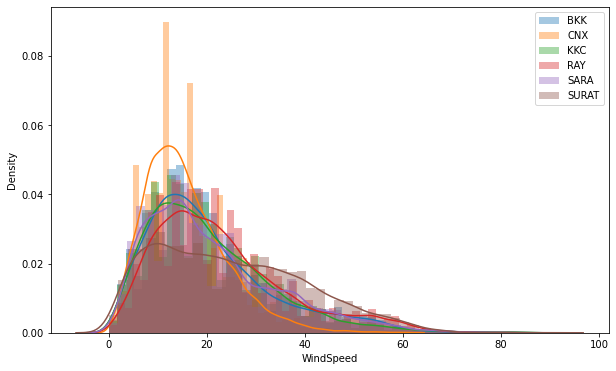

In [490]:
multiDisplot(train_set, 'WindSpeed', hist=True)

## Handle outliers

In [811]:
class Handle_Outliers:
  def __init__(self, dataset):
    self.dataset=dataset.copy()
    self.dataShape={}

    for prov, dfcol in dataset.items():
      self.dataShape[prov] = {}
      for col, _ in dfcol.items():
        self.dataShape[prov][col] = {'Kurt':{}, 'Skew':{}}
   
  def plotIQR(self, province, col, title="", thresh=None, fig=None, subplots=None, figsize=None):
    dataset = self.dataset

    if subplots is None: subplots = [211, 212]
    if figsize is None: figsize = (10,8)


    if fig is not None:
      rows = subplots[0]//100
      cols = (subplots[0]%100)//10
      fig.add_subplot(rows, cols, subplots[0]%10)
    else:
      plt.figure(figsize=figsize)
      plt.subplot(subplots[0])

    plt.title(title)
    plt.xlim(dataset[province][col].min()/1.1, dataset[province][col].max()*1.1)
    if thresh:
      plt.axvline(x=thresh[province]['min'])
      plt.axvline(x=thresh[province]['max'])

    ax = dataset[province][col].plot(kind='kde')

    if fig is not None:
      rows = subplots[1]//100
      cols = (subplots[1]%100)//10
      fig.add_subplot(rows, cols, subplots[1]%10)
    else:
      plt.figure(figsize=figsize)
      plt.subplot(subplots[1])
      
    plt.xlim(dataset[province][col].min()/1.1, dataset[province][col].max()*1.1)
    sns.boxplot(x=dataset[province][col])

    if thresh is not None:
      plt.axvline(x=thresh[province]['min'])
      plt.axvline(x=thresh[province]['max'])

    if subplots is None:
      plt.show()

  def calcDataShape(self, province, col, verbose=0, save_slot=None):
    dataset = self.dataset

    kurtosis_value = kurtosis(dataset[province][col])
    skew_value = skew(dataset[province][col])

    if (verbose>0):
      print("\n")
      print(f"kurtosis_value = {kurtosis_value}")
      print(f"skew_value = {skew_value}")

    if (save_slot is not None):
      self.saveDataShape(province, col, kurtosis_value, skew_value, save_slot)
  
  def showDataShape(self, province, col, save_slot=None):
    dataShape = self.dataShape

    if (save_slot is not None):
      kurtosis_value = dataShape[province][col]['Kurt'][save_slot]
      skew_value = dataShape[province][col]['Skew'][save_slot]
      print(f"{save_slot}:")
      print(f"kurtosis_value = {kurtosis_value}")
      print(f"skew_value = {skew_value}")
      print("\n")

    else:
      for sav_slot, _ in dataShape[province][col]['Kurt'].items():
        kurtosis_value = dataShape[province][col]['Kurt'][sav_slot]
        skew_value = dataShape[province][col]['Skew'][sav_slot]
        print(f"{sav_slot}:")
        print(f"kurtosis_value = {kurtosis_value}")
        print(f"skew_value = {skew_value}")
        print("\n")
  
  def saveDataShape(self, province, col, kurt, skew, save_slot):
    dataShape = self.dataShape

    dataShape[province][col]['Kurt'][save_slot] = kurt
    dataShape[province][col]['Skew'][save_slot] = skew
  
  def addColumns(self, col, new_col, func):
    dataset = self.dataset
    dataShape = self.dataShape

    for prov, _ in dataset.items():
      dataset[prov][new_col] = func(dataset[prov][col])
      dataShape[prov][new_col] = {'Kurt':{}, 'Skew':{}}
  
  def calcOutliersMinMax(self, province, col, C_std):
    dataset = self.dataset

    thresh_min = dataset[province][col].mean() - C_std*dataset[province][col].std()
    thresh_min = 0 if (thresh_min<0) else thresh_min

    thresh_max = dataset[province][col].mean() + C_std*dataset[province][col].std()
    
    return thresh_min, thresh_max
  
  def setOutliersThreshold(self, province, col, new_col, thresh):
    dataset = self.dataset

    min, max = thresh[province]['min'], thresh[province]['max']

    dataset[province][new_col] = dataset[province][col]

    dataset[province].loc[dataset[province][new_col]<min, new_col] = min
    dataset[province].loc[dataset[province][new_col]>max, new_col] = max

### Using IQR to detect outliers

In [812]:
handle_outliers = Handle_Outliers(train_set)

#### Before Log

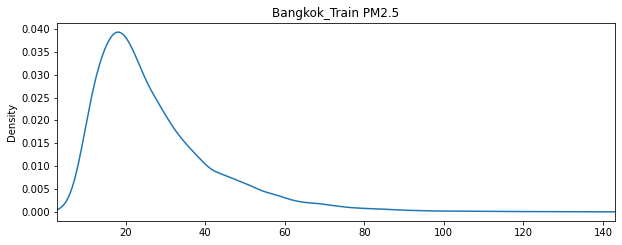

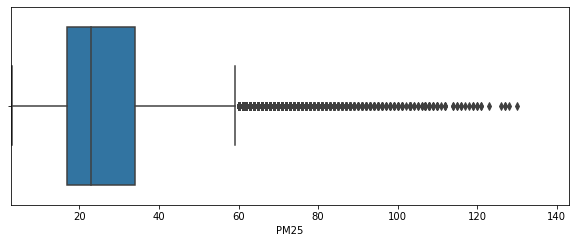

In [680]:
handle_outliers.plotIQR('BKK', 'PM25', 'Bangkok_Train PM2.5')
handle_outliers.calcDataShape('BKK', 'PM25', save_slot='Before')

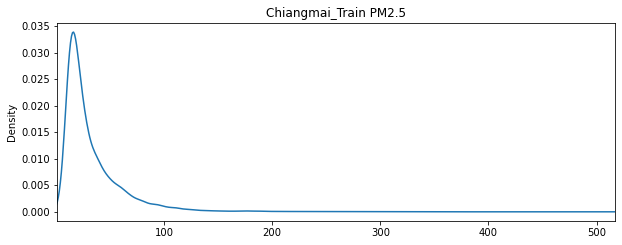

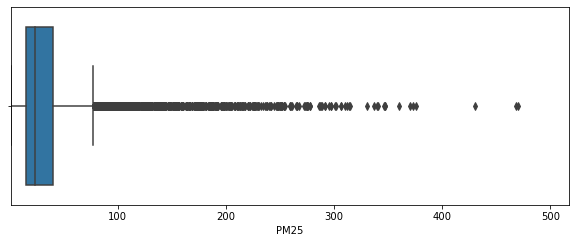

In [681]:
handle_outliers.plotIQR('CNX', 'PM25', "Chiangmai_Train PM2.5")
handle_outliers.calcDataShape('CNX', 'PM25', save_slot='Before')

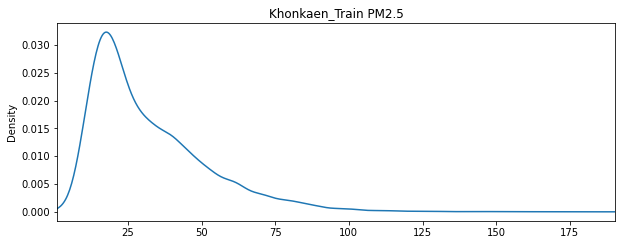

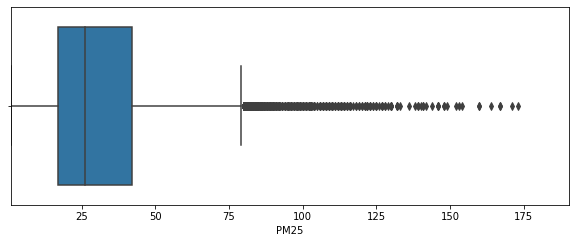

In [682]:
handle_outliers.plotIQR('KKC', 'PM25', "Khonkaen_Train PM2.5")
handle_outliers.calcDataShape('KKC', 'PM25', save_slot='Before')

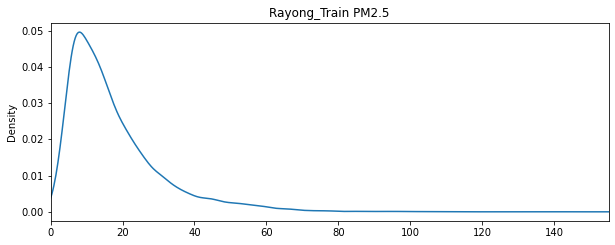

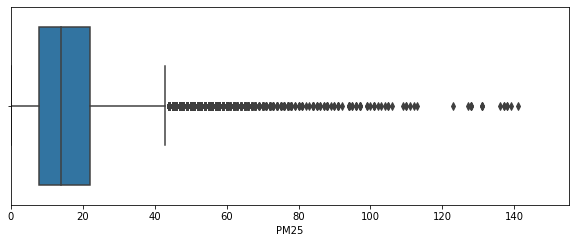

In [683]:
handle_outliers.plotIQR('RAY', 'PM25', "Rayong_Train PM2.5")
handle_outliers.calcDataShape('RAY', 'PM25', save_slot='Before')

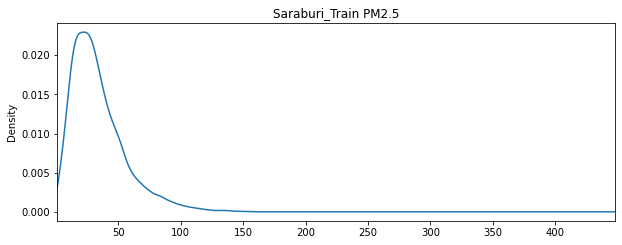

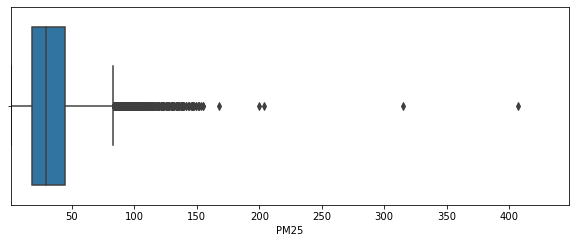

In [684]:
handle_outliers.plotIQR("SARA", 'PM25', "Saraburi_Train PM2.5")
handle_outliers.calcDataShape("SARA", 'PM25', save_slot='Before')

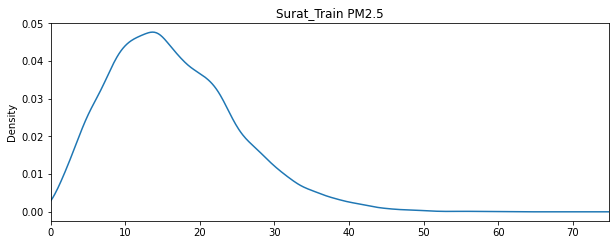

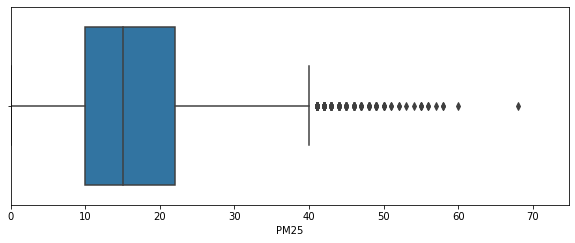

In [685]:
handle_outliers.plotIQR('SURAT', 'PM25', "Surat_Train PM2.5")
handle_outliers.calcDataShape('SURAT', 'PM25', save_slot='Before')

#### After Log

In [813]:
handle_outliers.addColumns('PM25', 'Log_PM25', lambda x: np.log(1+x))

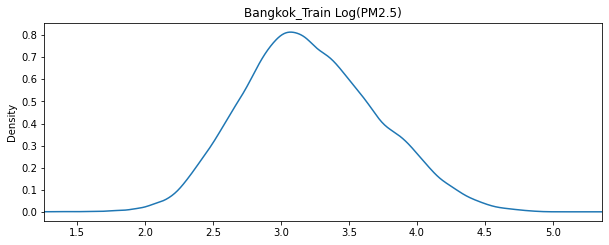

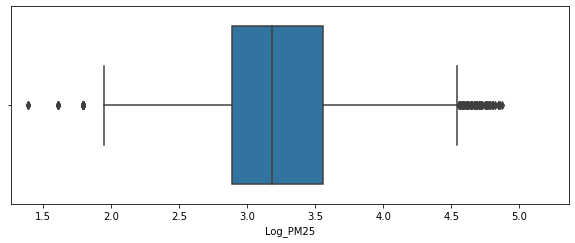

In [687]:
handle_outliers.plotIQR('BKK', 'Log_PM25', "Bangkok_Train Log(PM2.5)")
handle_outliers.calcDataShape('BKK', 'Log_PM25', save_slot='After')

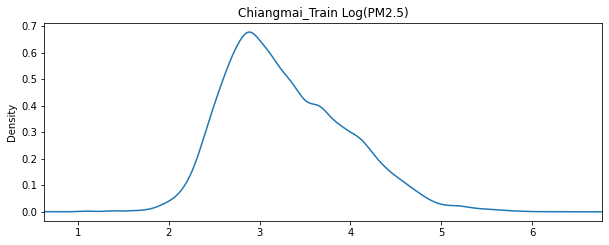

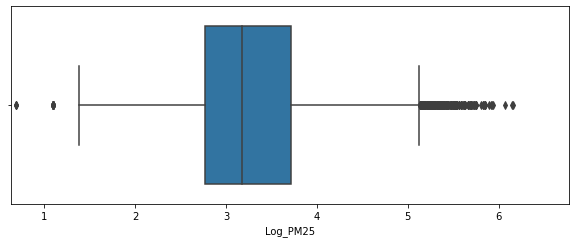

In [688]:
handle_outliers.plotIQR('CNX', 'Log_PM25', "Chiangmai_Train Log(PM2.5)")
handle_outliers.calcDataShape('CNX', 'Log_PM25', save_slot='After')

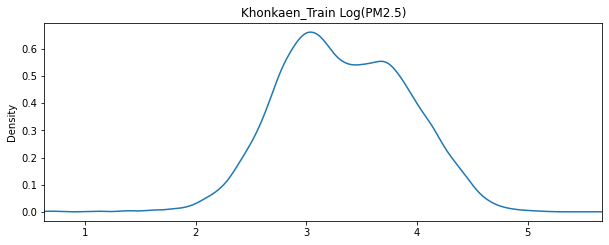

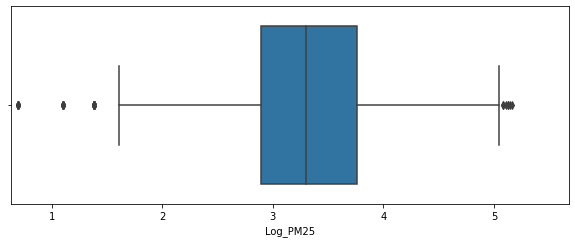

In [689]:
handle_outliers.plotIQR('KKC', 'Log_PM25', "Khonkaen_Train Log(PM2.5)")
handle_outliers.calcDataShape('KKC', 'Log_PM25', save_slot='After')

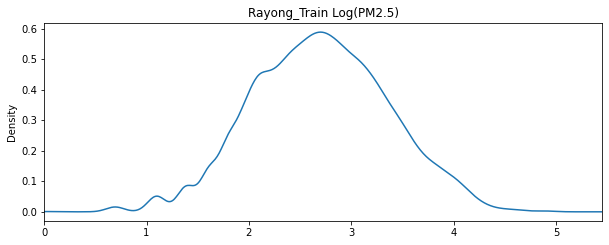

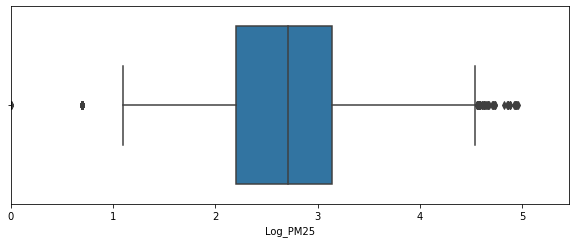

In [690]:
handle_outliers.plotIQR('RAY', 'Log_PM25', "Rayong_Train Log(PM2.5)")
handle_outliers.calcDataShape('RAY', 'Log_PM25', save_slot='After')

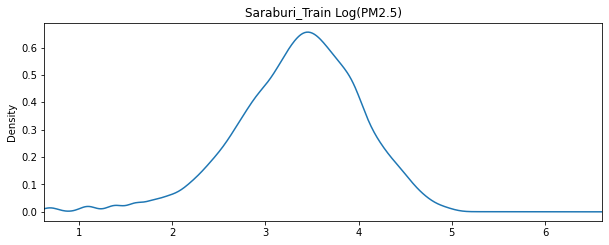

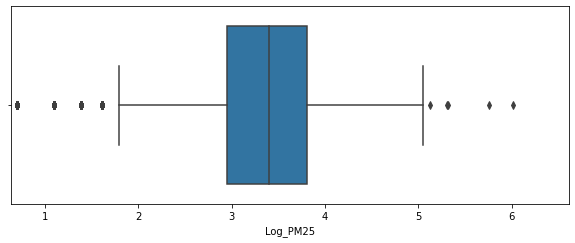

In [691]:
handle_outliers.plotIQR('SARA', 'Log_PM25', "Saraburi_Train Log(PM2.5)")
handle_outliers.calcDataShape('SARA', 'Log_PM25', save_slot='After')

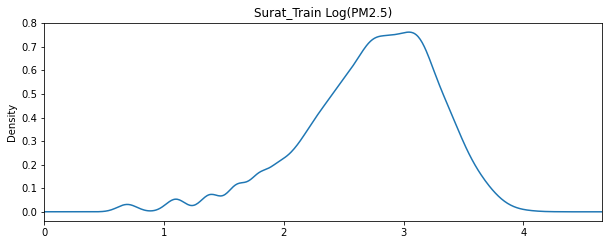

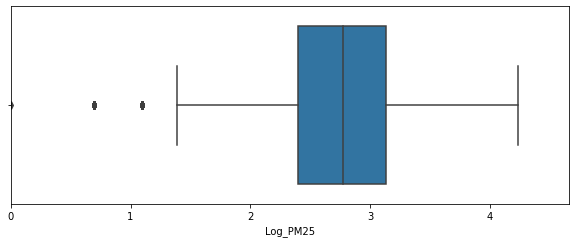

In [692]:
handle_outliers.plotIQR('SURAT', 'Log_PM25', "Surat_Train Log(PM2.5)")
handle_outliers.calcDataShape('SURAT', 'Log_PM25', save_slot='After')

#### Set the outliers to min or max

In [693]:
# handle_outliers.showDataShape('BKK', 'PM25', 'Before')
# handle_outliers.showDataShape('BKK', 'Log_PM25')

In [814]:
train_set['BKK'].describe(include='all')

,Temp,WindSpeed,WindDir,PM25,Log_PM25
count,26299.000000,26299.000000,26299.000000,26299.000000,26299.000000
mean,29.810069,20.479410,167.592684,27.309441,3.217490
std,2.653087,13.030854,92.230443,15.368269,0.494102
min,17.200000,0.000000,0.000000,3.000000,1.386294
25%,28.000000,11.000000,80.000000,17.000000,2.890372
50%,29.600000,17.000000,155.000000,23.000000,3.178054
75%,31.600000,27.000000,260.000000,34.000000,3.555348
max,38.100000,85.000000,360.000000,130.000000,4.875197


In [815]:
thresh = {}

for prov, _ in train_set.items():
    thresh[prov] = {}
    thresh[prov]['min'], thresh[prov]['max'] = handle_outliers.calcOutliersMinMax(prov, 'Log_PM25', 3)
    handle_outliers.setOutliersThreshold(prov, 'Log_PM25', 'new_Log_PM25', thresh)

handle_outliers.addColumns('new_Log_PM25','new_PM25', lambda x: np.exp(x)-1)

##### Example 'Saraburi' : Boxplots of old and new PM2.5 after outlier handling

In [816]:
handle_outliers.dataset['SARA'].describe()

,Temp,WindSpeed,WindDir,PM25,Log_PM25,new_Log_PM25,new_PM25
count,26302.000000,26302.000000,26302.000000,26302.000000,26302.000000,26302.000000,26302.000000
mean,28.329245,21.015360,173.065546,33.852616,3.351286,3.354525,33.851236
std,4.062801,13.520995,83.727460,21.925800,0.671915,0.660619,21.777554
min,14.000000,0.000000,0.000000,1.000000,0.693147,1.335541,2.802054
25%,25.400000,11.000000,90.000000,18.000000,2.944439,2.944439,18.000000
50%,27.800000,18.000000,180.000000,29.000000,3.401197,3.401197,29.000000
75%,31.200000,28.000000,250.000000,44.000000,3.806662,3.806662,44.000000
max,40.900000,91.000000,360.000000,407.000000,6.011267,5.367030,213.225732


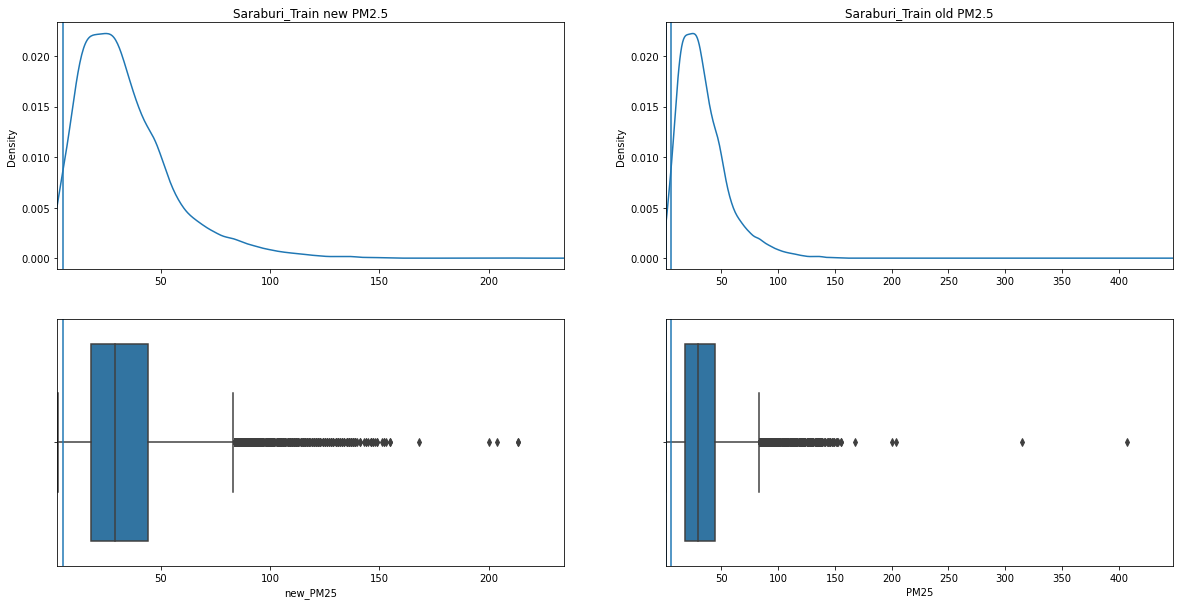

In [817]:
fig = plt.figure(figsize=(20,10))

handle_outliers.plotIQR('SARA', 'new_PM25', 'Saraburi_Train new PM2.5', thresh, fig=fig, subplots=[221, 223], figsize=(15,10))
handle_outliers.plotIQR('SARA', 'PM25', 'Saraburi_Train old PM2.5', thresh, fig=fig, subplots=[222, 224], figsize=(15,10))
plt.show()

## SARIMAX

In [818]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

import pickle

In [848]:
bkk_train_tmp = handle_outliers.dataset['BKK'][['new_PM25', 'Temp', 'WindSpeed', 'WindDir']]
bkk_train_tmp.rename(columns={'new_PM25':'PM25'}, inplace=True)

bkk_train_tmp = handle_outliers.dataset['BKK'][['new_PM25', 'Temp', 'WindSpeed', 'WindDir']]
bkk_train_tmp.rename(columns={'new_PM25':'PM25'}, inplace=True)


In [849]:
bkk_train_tmp.head()

,PM25,Temp,WindSpeed,WindDir
Time,,,,
2017-07-01 01:00:00,10.0,27.9,16,260
2017-07-01 02:00:00,17.0,27.9,16,255
2017-07-01 03:00:00,20.0,27.9,16,255
2017-07-01 04:00:00,15.0,27.4,16,255
2017-07-01 05:00:00,16.0,27.4,17,235


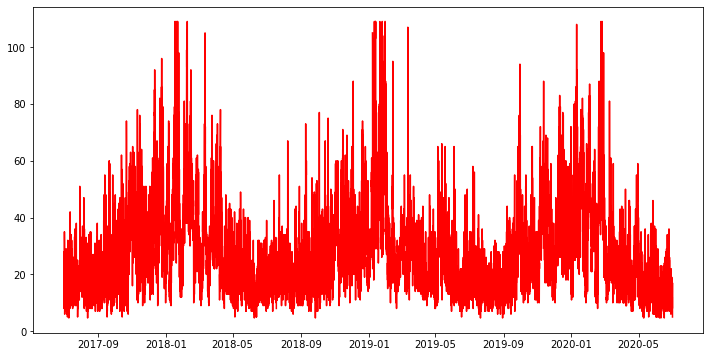

In [793]:
# bkk_train_tmp = bkk_train_tmp.resample('H').mean()
# plt.figure(figsize=(12,6))
# plt.plot(bkk_train_tmp['PM25'],'r')

In [850]:
bkk_train_tmp.head()

,PM25,Temp,WindSpeed,WindDir
Time,,,,
2017-07-01 01:00:00,10.0,27.9,16,260
2017-07-01 02:00:00,17.0,27.9,16,255
2017-07-01 03:00:00,20.0,27.9,16,255
2017-07-01 04:00:00,15.0,27.4,16,255
2017-07-01 05:00:00,16.0,27.4,17,235


In [851]:
bkk_test = test_set['BKK']

In [853]:
bkk_train_tmp.shape

(26299, 4)

In [854]:
bkk_test.shape

(8782, 4)

In [855]:
train_size, valid_size = bkk_train_tmp.shape[0]-bkk_test.shape[0], bkk_test.shape[0]

bkk_train, bkk_valid = bkk_train_tmp.iloc[:train_size], bkk_train_tmp.iloc[train_size: ],

In [856]:
bkk_train.shape

(17517, 4)

In [863]:
best_order = (0, 1, 1)
best_seasonal_order = (1, 1, 0, 365)

exog_columns = ['Temp', 'WindSpeed', 'WindDir']

In [864]:
mod_bkk = SARIMAX(bkk_train['PM25'],
              exog=bkk_train[exog_columns],
              order=best_order,
              seasonal_order=best_seasonal_order,
              enforce_stationarity=False,
              enforce_invertibility=False)

results_bkk = mod_bkk.fit()

print(results_bkk.summary().tables[1])

In [859]:
# Open file - Write binary mode
model_file = open('mod_bkk.model', 'wb')

# Save Decision tree model
pickle.dump(mod_bkk, model_file)

# Close file
model_file.close()

In [860]:
test_exog = pd.concat((bkk_valid[exog_columns], bkk_test[exog_columns]), axis=0)

In [861]:
bkk_test.index[0]

Timestamp('2020-07-01 01:00:00')

In [862]:
bkk_pred = results_bkk.get_prediction(start=bkk_test.index[0], end=bkk_test.index[-1], exog=test_exog, dynamic=False)
bkk_pred_ci = bkk_pred.conf_int()

ValueError: Provided exogenous values are not of the appropriate shape. Required (17569, 3), got (17564, 3).

In [ ]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(bkk_train['PM2.5(µg/m3)'], color='g',label='ground truth')
pred.predicted_mean.plot(alpha=.7, color='r',label='predict')
plt.legend(loc="upper right")

plt.show()